# Plotting and visualization

In [2]:
import numpy as np
import pandas as pd
pd.options.display.max_rows = 10
np.set_printoptions(precision=4, suppress=True)

import matplotlib.pyplot as plt
import matplotlib
plt.rc('figure', figsize=(10, 6))
%matplotlib inline

## A brief matplotlib API primer

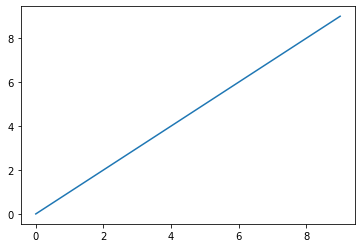

In [3]:
data = np.arange(10)
data
plt.plot(data)

### Figures and subplots

In [4]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [5]:
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)

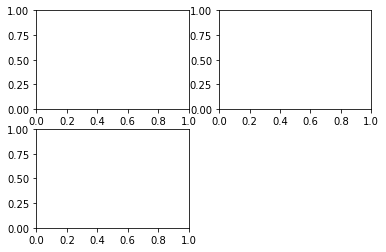

In [6]:
fig

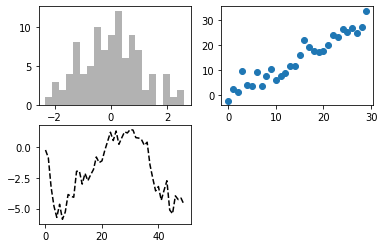

In [7]:
ax1.hist(np.random.randn(100), bins=20, color='k', alpha=0.3)
ax2.scatter(np.arange(30), np.arange(30) + 3 * np.random.randn(30))
ax3.plot(np.random.randn(50).cumsum(), 'k--')
fig

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10843b850>,
      dtype=object)

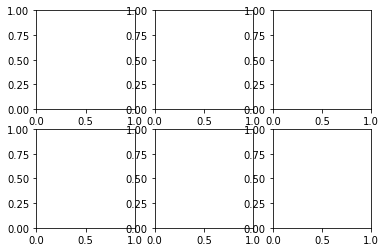

In [8]:
fig, axes = plt.subplots(2, 3)
axes

#### Adjusting the spacing around subplots

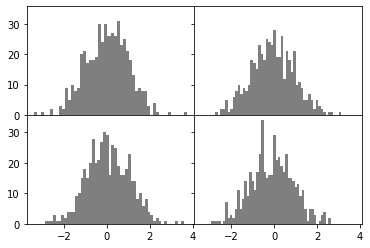

In [9]:
fig, axes = plt.subplots(2, 2, sharex=True, sharey=True)
for i in range(2):
    for j in range(2):
        axes[i, j].hist(np.random.randn(500), bins=50, color='k', alpha=0.5)
plt.subplots_adjust(wspace=0, hspace=0)

### Colors, markers, and line styles

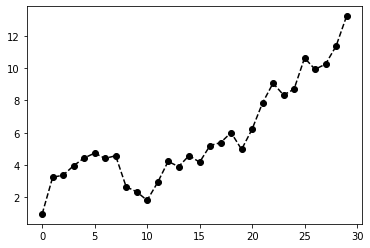

In [10]:
from numpy.random import randn
plt.plot(randn(30).cumsum(), 'ko--')

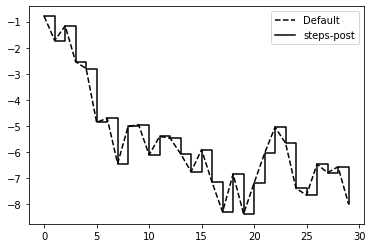

In [11]:
data = np.random.randn(30).cumsum()
plt.plot(data, 'k--', label='Default')
plt.plot(data, 'k-', drawstyle='steps-post', label='steps-post')
plt.legend(loc='best')

### Ticks, labels, and legends

#### Setting the title, axis labels, ticks, and ticklabels

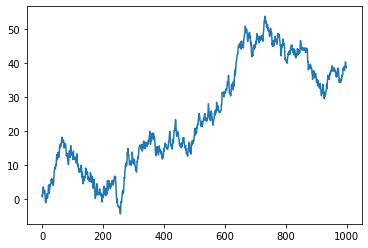

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(np.random.randn(1000).cumsum())

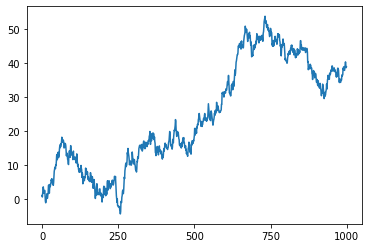

In [13]:
ticks = ax.set_xticks([0, 250, 500, 750, 1000])
fig

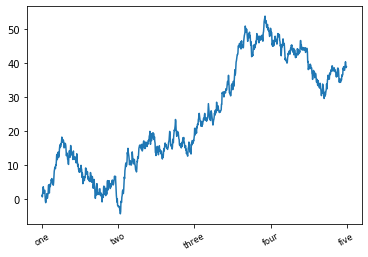

In [14]:
labels = ax.set_xticklabels(['one', 'two', 'three', 'four', 'five'],
                            rotation=30, fontsize='small')
fig

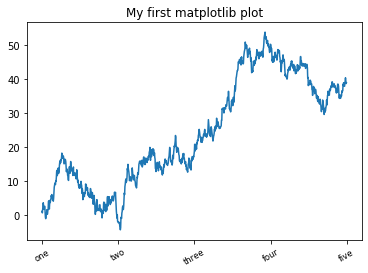

In [15]:
ax.set_title('My first matplotlib plot')
fig

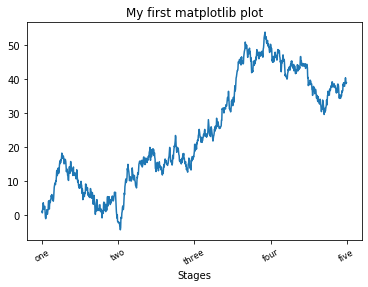

In [16]:
ax.set_xlabel('Stages')
fig

#### Adding legends

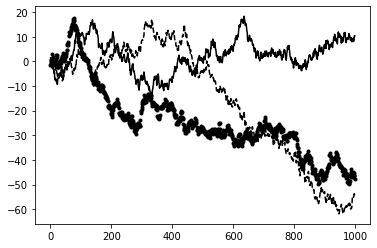

In [17]:
from numpy.random import randn
fig = plt.figure(); ax = fig.add_subplot(1, 1, 1)
ax.plot(randn(1000).cumsum(), 'k', label='one')
ax.plot(randn(1000).cumsum(), 'k--', label='two')
ax.plot(randn(1000).cumsum(), 'k.', label='three')

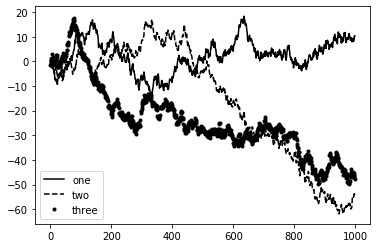

In [18]:
ax.legend(loc='best')
fig

### Annotations and drawing on a subplot

In [19]:
from datetime import datetime

data = pd.read_csv('spx.csv', index_col=0, parse_dates=True)
data.head()

,SPX
1990-02-01,328.79
1990-02-02,330.92
1990-02-05,331.85
1990-02-06,329.66
1990-02-07,333.75


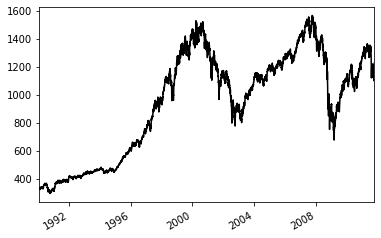

In [20]:
spx = data['SPX']

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

spx.plot(ax=ax, style='k-')

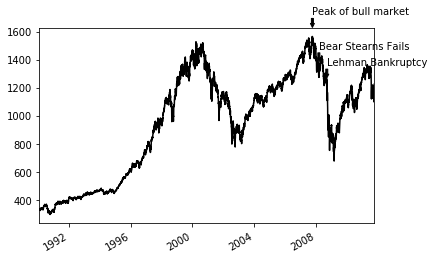

In [21]:
crisis_data = [
    (datetime(2007, 10, 11), 'Peak of bull market'),
    (datetime(2008, 3, 12), 'Bear Stearns Fails'),
    (datetime(2008, 9, 15), 'Lehman Bankruptcy')
]

for date, label in crisis_data:
    ax.annotate(label, xy=(date, spx.asof(date) + 75),
                xytext=(date, spx.asof(date) + 225),
                arrowprops=dict(facecolor='black', headwidth=4, width=2,
                                headlength=4),
                horizontalalignment='left', verticalalignment='top')
fig

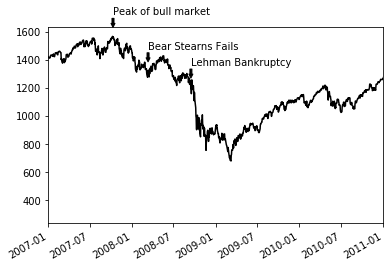

In [22]:
# Zoom in on 2007-2010
ax.set_xlim(['1/1/2007', '1/1/2011'])
fig

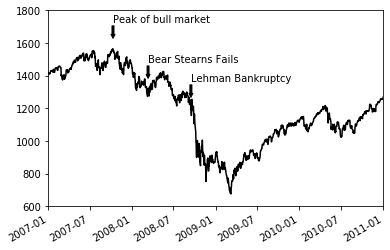

In [23]:
ax.set_ylim([600, 1800])
fig

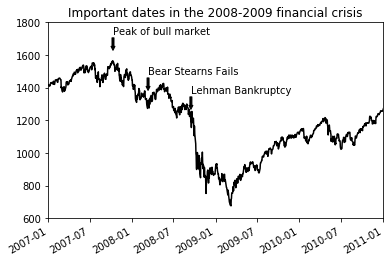

In [24]:
ax.set_title('Important dates in the 2008-2009 financial crisis')
fig

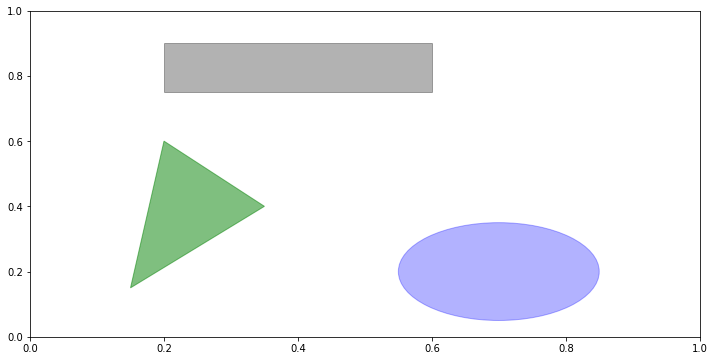

In [25]:
fig = plt.figure(figsize=(12, 6)); ax = fig.add_subplot(1, 1, 1)
rect = plt.Rectangle((0.2, 0.75), 0.4, 0.15, color='k', alpha=0.3)
circ = plt.Circle((0.7, 0.2), 0.15, color='b', alpha=0.3)
pgon = plt.Polygon([[0.15, 0.15], [0.35, 0.4], [0.2, 0.6]],
                   color='g', alpha=0.5)
ax.add_patch(rect)
ax.add_patch(circ)
ax.add_patch(pgon)

### Saving plots to file

plt.savefig('figpath.svg')

plt.savefig('figpath.png', dpi=400, bbox_inches='tight')

from io import BytesIO
buffer = BytesIO()
plt.savefig(buffer)
plot_data = buffer.getvalue()

### matplotlib configuration

plt.rc('figure', figsize=(10, 10))

font_options = {'family' : 'monospace',
                'weight' : 'bold',
                'size'   : 'small'}
plt.rc('font', **font_options)

## Plotting with pandas and seaborn

### Line plots

In [26]:
s = pd.Series(np.random.randn(10).cumsum(), index=np.arange(0, 100, 10))
s

0     0.425703
10    0.207164
20   -0.277028
30    0.679485
40    0.954032
50    0.320611
60   -0.473562
70   -0.752263
80   -1.427299
90   -0.913983
dtype: float64

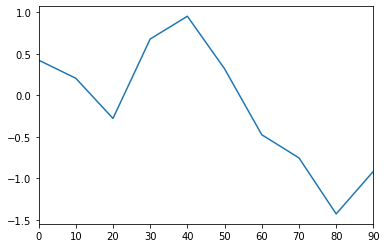

In [27]:
s.plot()

In [28]:
df = pd.DataFrame(np.random.randn(10, 4).cumsum(0),
                  columns=['A', 'B', 'C', 'D'],
                  index=np.arange(0, 100, 10))
df

,A,B,C,D
0,-1.825876,-0.104227,-0.425897,-0.271401
10,-1.978853,-0.350819,0.398776,-0.471554
20,-2.680251,-0.821157,0.460656,0.206606
30,-3.095138,0.123069,-0.683862,-0.046367
40,-1.879589,0.915468,0.272140,-1.621218
50,-1.563548,-0.199404,1.428108,-0.110252
60,-2.476158,-2.068396,1.702093,0.414822
70,-1.944681,-1.679389,1.551885,-0.591097
80,-1.970613,-1.931658,4.874795,-1.425916
90,-1.354133,-0.911387,5.761159,-1.595595


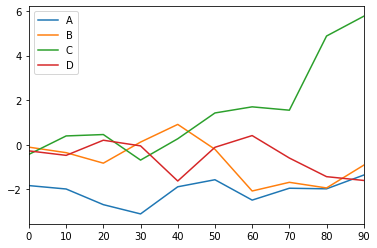

In [29]:
df.plot()

### Bar plots

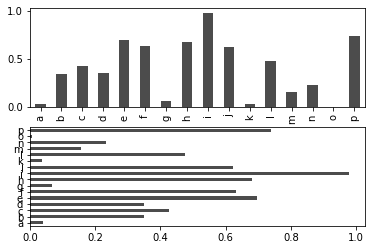

In [30]:
fig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(16), index=list('abcdefghijklmnop'))
data.plot.bar(ax=axes[0], color='k', alpha=0.7)
data.plot.barh(ax=axes[1], color='k', alpha=0.7)

In [31]:
np.random.seed(12348)

In [32]:
df = pd.DataFrame(np.random.rand(6, 4),
                  index=['one', 'two', 'three', 'four', 'five', 'six'],
                  columns=pd.Index(['A', 'B', 'C', 'D'], name='Genus'))
df

Genus,A,B,C,D
one,0.370670,0.602792,0.229159,0.486744
two,0.420082,0.571653,0.049024,0.880592
three,0.814568,0.277160,0.880316,0.431326
four,0.374020,0.899420,0.460304,0.100843
five,0.433270,0.125107,0.494675,0.961825
six,0.601648,0.478576,0.205690,0.560547


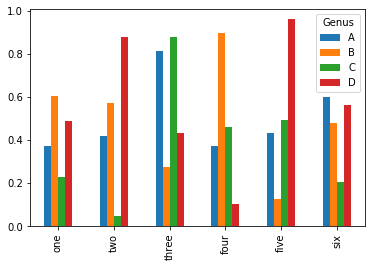

In [33]:
df.plot.bar()

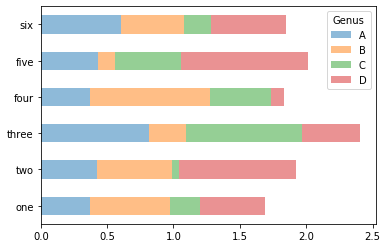

In [34]:
df.plot.barh(stacked=True, alpha=0.5)

In [35]:
tips = pd.read_csv('tips.csv')
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [36]:
party_counts = pd.crosstab(tips['day'], tips['size'])
party_counts

size,1,2,3,4,5,6
day,,,,,,
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1
Thur,1,48,4,5,1,3


In [37]:
# Not many 1- and 6-person parties
party_counts = party_counts.loc[:, 2:5]
party_counts

size,2,3,4,5
day,,,,
Fri,16,1,1,0
Sat,53,18,13,1
Sun,39,15,18,3
Thur,48,4,5,1


In [38]:
# Normalize to sum to 1
party_pcts = party_counts.div(party_counts.sum(1), axis=0)
party_pcts

size,2,3,4,5
day,,,,
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000
Thur,0.827586,0.068966,0.086207,0.017241


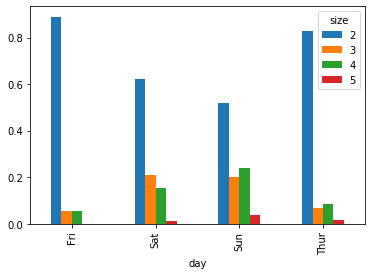

In [39]:
party_pcts.plot.bar()

In [40]:
import seaborn as sns
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips.head()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


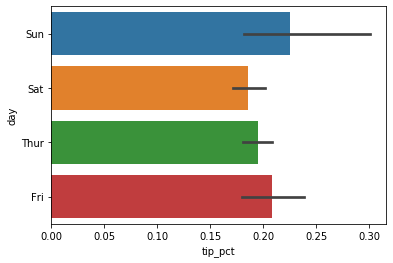

In [41]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')

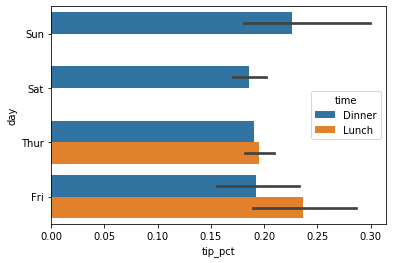

In [42]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

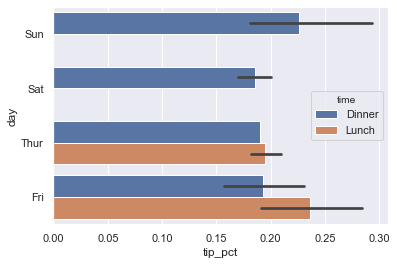

In [43]:
sns.set(style="darkgrid")
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')

### Histograms and density plots

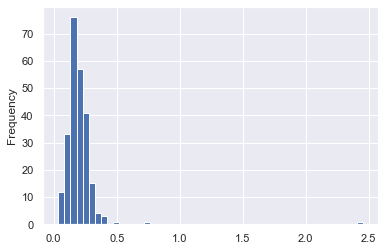

In [44]:
tips['tip_pct'].plot.hist(bins=50)

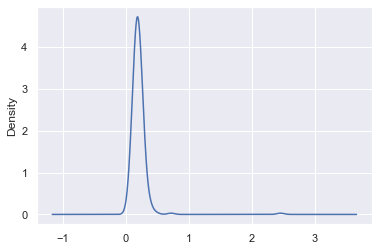

In [45]:
tips['tip_pct'].plot.density()

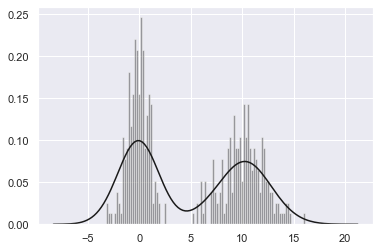

In [46]:
comp1 = np.random.normal(0, 1, size=200)
comp2 = np.random.normal(10, 2, size=200)
values = pd.Series(np.concatenate([comp1, comp2]))
# sns.distplot is deprecated, so we use sns.histplot with kde set to True instead
#sns.histplot(values, bins=100, color='k', kde=True)
sns.distplot(values, bins=100, color='k', kde=True)

### Scatter or point plots

In [47]:
macro = pd.read_csv('macrodata.csv')
data = macro[['cpi', 'm1', 'tbilrate', 'unemp']]
trans_data = np.log(data).diff().dropna()
trans_data[-5:]

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


Text(0.5, 1.0, 'Changes in log m1 versus log unemp')

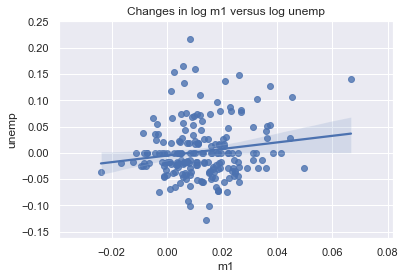

In [48]:
sns.regplot(x='m1', y='unemp', data=trans_data)
plt.title('Changes in log {} versus log {}'.format('m1', 'unemp'))

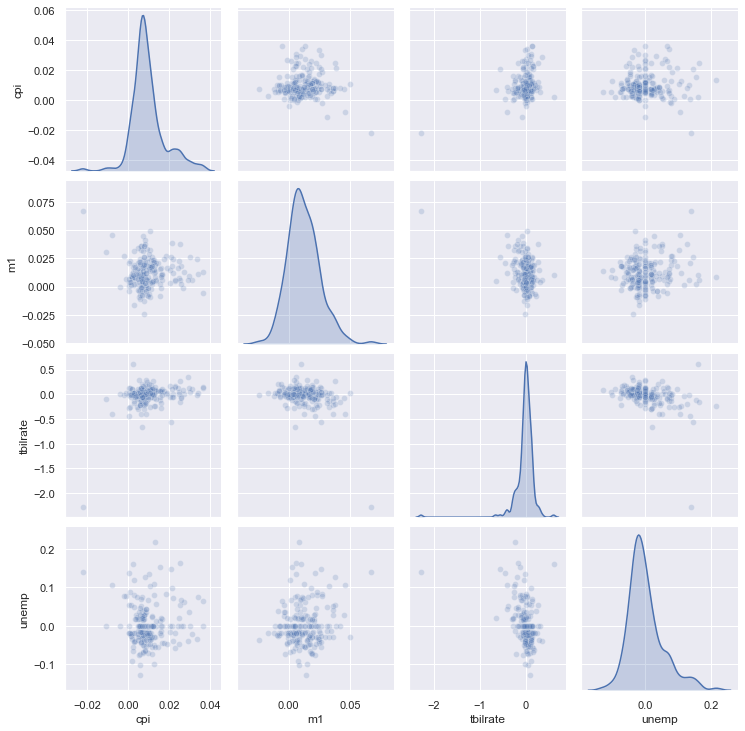

In [49]:
sns.pairplot(trans_data, diag_kind='kde', plot_kws={'alpha': 0.2})

### Facet grids and categorical data

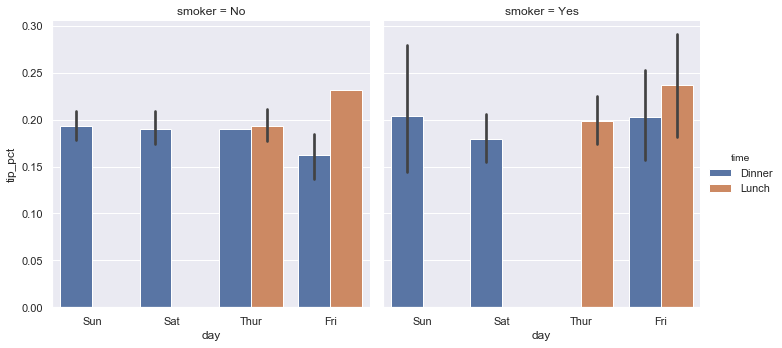

In [50]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

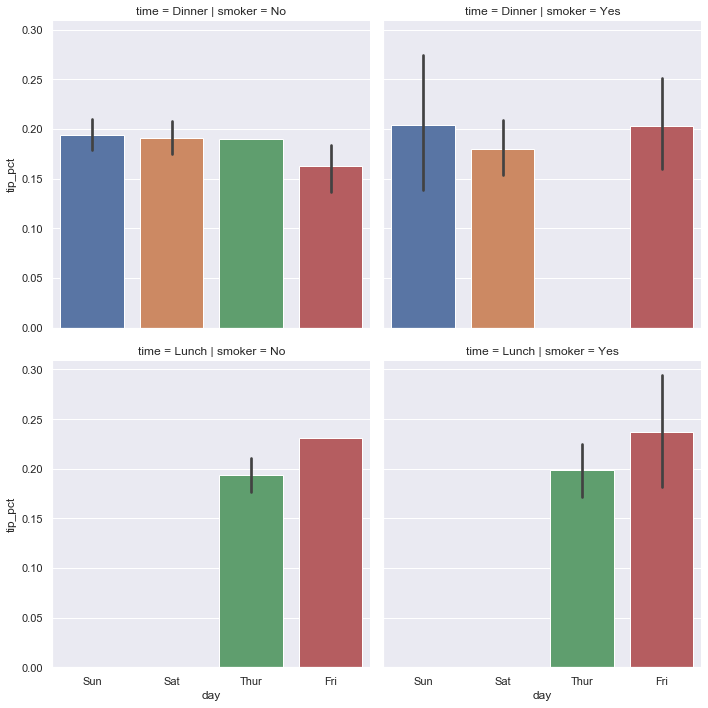

In [51]:
sns.catplot(x='day', y='tip_pct', row='time',
            col='smoker',
            kind='bar', data=tips[tips.tip_pct < 1])

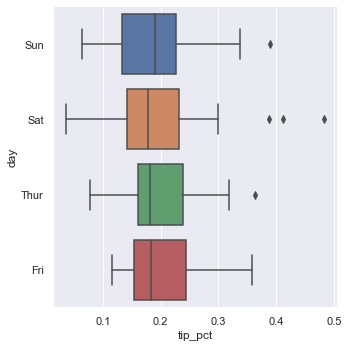

In [52]:
sns.catplot(x='tip_pct', y='day', kind='box',
               data=tips[tips.tip_pct < 0.5])

In [55]:
display(tips)
#tips[tips.tip_pct < 0.5]

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069
...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0.256166
240,27.18,2.00,Yes,Sat,Dinner,2,0.079428
241,22.67,2.00,Yes,Sat,Dinner,2,0.096759
242,17.82,1.75,No,Sat,Dinner,2,0.108899


In [54]:
tips.dtypes

total_bill    float64
tip           float64
smoker         object
day            object
time           object
size            int64
tip_pct       float64
dtype: object